In [6]:
# -*- coding: utf-8 -*-
"""
Fast Dataset Creator V2.0.0
Created on Fri March 3 2023
Author: Adill Al-Ashgar
University of Bristol

### Improvements to be made
# Add a way to have some files rotated some shifted some not without making the input settings to complicated
"""



'\nFast Dataset Creator V2.0.0\nCreated on Fri March 3 2023\nAuthor: Adill Al-Ashgar\nUniversity of Bristol\n\n### Improvements to be made\n# Add a way to have some files rotated some shifted some not without making the input settings to complicated\n'

In [7]:
"""
### Number of data files of each type to generate  # (~96KB each, which scales linearly so 10,000 ~ 980MB)
number_of_blanks = 0            # Number of blank data files to 
number_of_hemisphere = 0        # Number of hemisphere data files to generate

number_single_x = 0             # Number of single x data files to generate
number_of_two_x = 0             # Number of two x data files to generate
number_of_three_x = 0           # Number of three x data files to generate
number_of_four_x = 0            # Number of four x data files to generate

number_single_realisitic = 50000   # Number of realistic data files to generate
number_of_two_realisitic = 0        # Number of two realistic data files to generate
number_of_three_realisitic = 0      # Number of three realistic data files to generate
number_of_four_realisitic = 0       # Number of four realistic data files to generate

number_single_parabola = 0         # Number of single parabola data files to generate
number_of_two_parabola = 0          # Number of two parabola data files to generate
number_of_three_parabola = 0        # Number of three parabola data files to generate
number_of_four_parabola = 0         # Number of four parabola data files to generate

# Shared Settings
shift_positions = True         #If True then the signal positions are shifted by a random amount, otherwise they are not

# X Gen Settings
rotate_x_positions = False     #If True then the x signals are rotated, otherwise they are not
rotate_seperatly = True        #If True then each x signal is rotated by a random amount, otherwise they are all rotated by the same amount (only used if rotate_x_positions is True)

#Realistic Gen Settings
ideal_hit_spread = True        #If True then the hit points spread is idealised as linearly spaced in the pattern, otherwise points are chosen randomly from pattern 
"""


'\n### Number of data files of each type to generate  # (~96KB each, which scales linearly so 10,000 ~ 980MB)\nnumber_of_blanks = 0            # Number of blank data files to \nnumber_of_hemisphere = 0        # Number of hemisphere data files to generate\n\nnumber_single_x = 0             # Number of single x data files to generate\nnumber_of_two_x = 0             # Number of two x data files to generate\nnumber_of_three_x = 0           # Number of three x data files to generate\nnumber_of_four_x = 0            # Number of four x data files to generate\n\nnumber_single_realisitic = 50000   # Number of realistic data files to generate\nnumber_of_two_realisitic = 0        # Number of two realistic data files to generate\nnumber_of_three_realisitic = 0      # Number of three realistic data files to generate\nnumber_of_four_realisitic = 0       # Number of four realistic data files to generate\n\nnumber_single_parabola = 0         # Number of single parabola data files to generate\nnumber_

In [8]:
#%% - User Inputs
bundles = 1
bundle_size = 10000

xdim = 88                                             # X dimension of image
ydim = 128                                            # Y dimension of image
time_dimension = 1000                                  # Time dimension of image

number_of_blanks = 0
number_single_x = 0 # DO NOT USE< THIS IS A PLACEHOLDER TILL CONNECTED
number_single_realisitic = 1000
number_single_parabola = 0

#sig_pts = 2000                                         # Number of signal points to generate
data_set_title = "V3_10K_FAST_RDT" #"V3_95RDT_5BLANK_20K"          # Ouput title of dataset
data_sets_folder = r"N:\Yr 3 Project Datasets\\"      # Folder to save dataset to


#%% - Dependencies
#External Libraries
import datetime          # Current local time and date
import torch 
import matplotlib.pyplot as plt 
from tqdm import tqdm
import os

# Local Custom Generators
from Blank_Generator.Blank_Data_Image_Generator import generate_blanks         # Import custom function for generating blank images
from RDT_Gen import generate_rdt_data_tensors
from PDT_Gen import genrate_pdt_data_tensors


#%% - Program Initalisation
# Combine output folder and dataset information folder
output_dir = data_sets_folder + data_set_title + "\\Data\\"     # Add the data folder to the end of the output directory
output_dataset_info = data_sets_folder + data_set_title + " Information.txt"   # Add the information file to the end of the output directory
output_dataset_dist_img = data_sets_folder + data_set_title    

# create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)



#%% Generation
for bundle_idx in tqdm(range(bundles), desc="Bundle", leave=True, dynamic_ncols=True, colour="red"):
    bundle = torch.zeros(bundle_size, 1, ydim, xdim, dtype=torch.float64)
    randomised_indexs = torch.randperm(bundle_size)

    if number_of_blanks > 0:
        bundle[randomised_indexs[:number_of_blanks]] = generate_blanks(xdim=xdim, ydim=ydim, number_of_files=number_of_blanks) 
    
    if number_single_x > 0:   # Placeholder, 1's everywhwere
        bundle[randomised_indexs[number_of_blanks:(number_of_blanks+number_single_x)]] = torch.ones(number_single_x, 1, ydim, xdim, dtype=torch.float64)*5

    if number_single_realisitic > 0:
        bundle[randomised_indexs[number_of_blanks+number_single_x:number_of_blanks+number_single_x+number_single_realisitic]] = generate_rdt_data_tensors(number_single_realisitic, 0, 1, 3, xdim, ydim, time_dimension, show=False, origin=None)

    if number_single_parabola > 0:
        bundle[randomised_indexs[-number_single_parabola:]] = genrate_pdt_data_tensors(xdim, ydim, time_dimension, number_single_parabola, origin=None)

    # save bundle to disk as .pt file in thew output dir
    torch.save(bundle, output_dir + f"V3_bundle_{bundle_idx}.pt") 

print("Dataset Generation Completed")   # Print to console to show that dataset generation has completed


Bundle: 100%|██████████| 1/1 [00:14<00:00, 14.16s/it]

Dataset Generation Completed


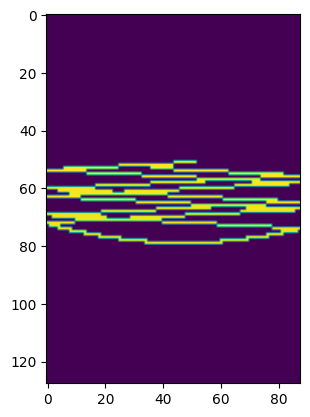

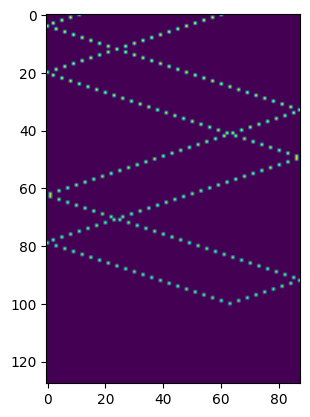

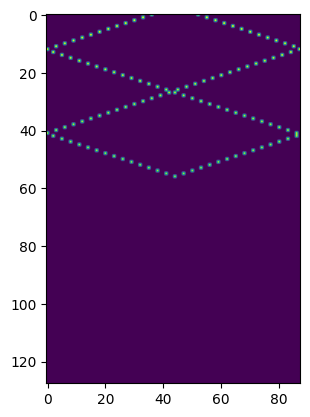

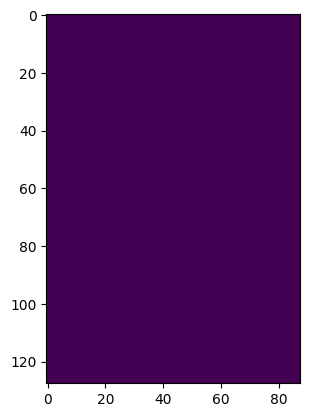

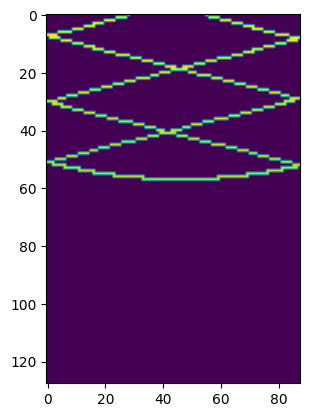

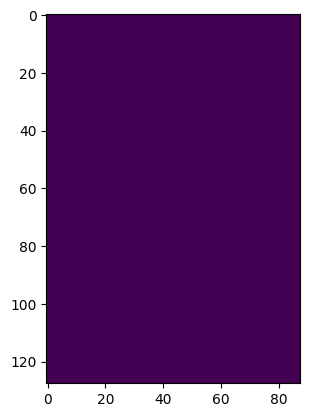

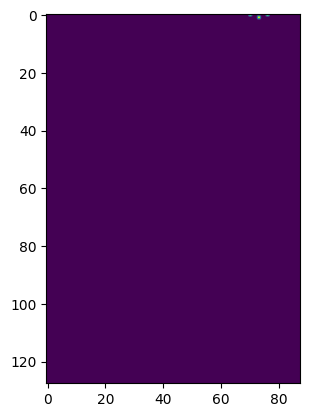

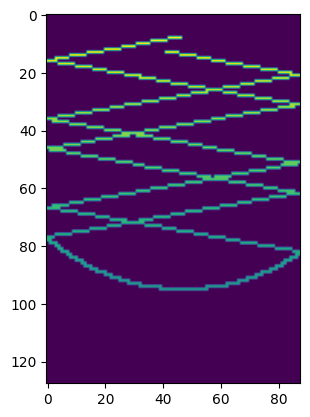

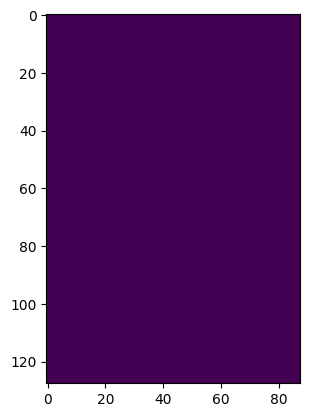

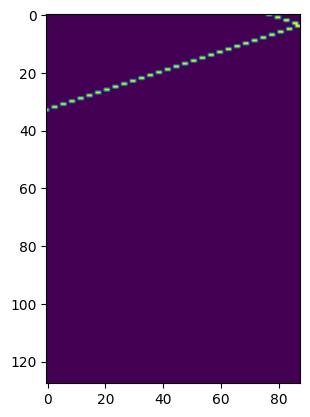

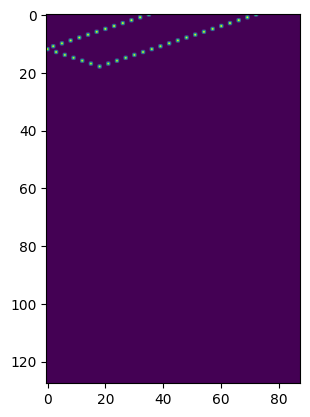

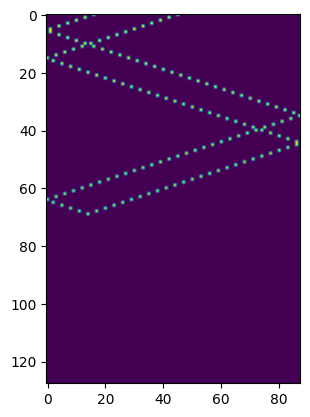

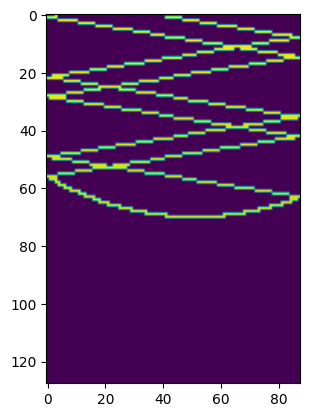

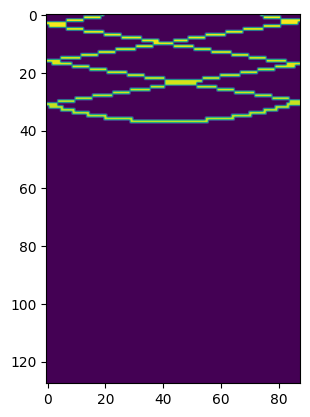

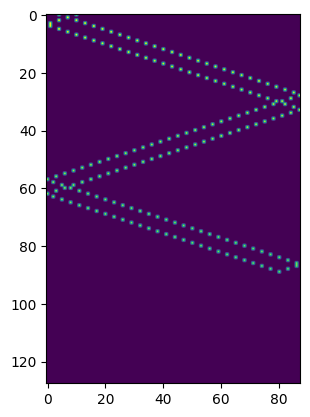

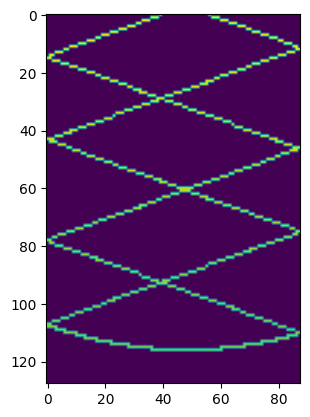

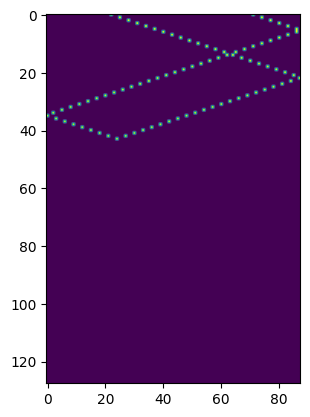

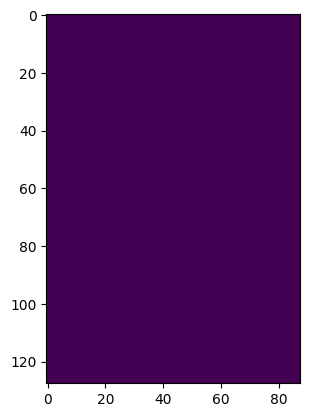

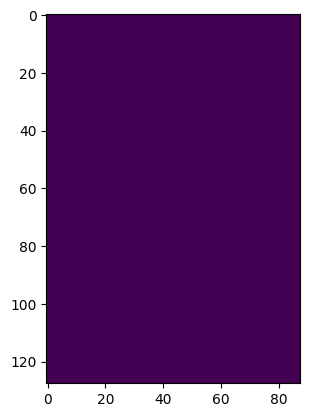

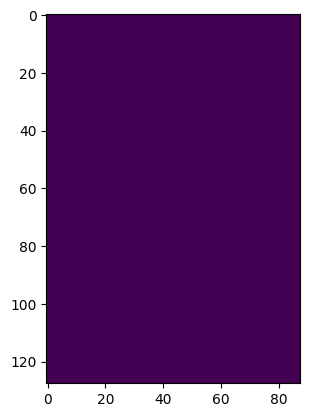

In [7]:

# Local Dataset Validation Functions
from DC3D_V3.Helper_files.Dataset_distribution_tester_V1 import dataset_distribution_tester  # Import custom function for testing the distribution of the dataset
from DC3D_V3.Helper_files.Dataset_Integrity_Check_V1 import dataset_integrity_check          # Import custom function for testing the integrity of values in the dataset


#%% - Run Tests
try:
    print("\nVerifying Dataset Integrity...")
    integrity_results = dataset_integrity_check(output_dir, full_test=True, print_output=True)  # Run dataset integrity test
    
    print("\nVerifying Dataset TOF Distribution...")
    distribution_results = dataset_distribution_tester(output_dir, time_dimension=time_dimension, ignore_zero_vals_on_plot=True, output_image_dir=output_dataset_dist_img) # Run dataset distribution test

except:                             #If test itself fails then result is automatically set to fail with unknown cause.
    dataset_tests_fail = True

print("- All Tests Completed -\n")

#%% - Generate Dataset Information txt and save it alongside distribution png 
print("Generating Dataset Details as txt file...")
# Save .txt Encoder/Decoder Network Summary
with open(output_dataset_info, 'w', encoding='utf-8') as output_file:    #utf_8 encoding needed as default (cp1252) unable to write special charecters present in the summary
    
    # Write the local date and time to the file
    TD_now = datetime.datetime.now()         # Get the current local date and time
    output_file.write(f"Date dataset created: {TD_now.strftime('%Y-%m-%d %H:%M:%S')}\n")    
    output_file.write((f"Dataset ID: {data_set_title}\n"))
    
    output_file.write("\nInput Settings:\n")            # Write the input settings to the file
    output_file.write((f"X dim: {xdim} pixels\n"))
    output_file.write((f"Y dim: {ydim} pixels\n"))
    output_file.write((f"Time dim: {time_dimension}\n"))
    output_file.write((f"Signal Points: {sig_pts}\n"))
    output_file.write((f"Shift on: {shift_positions}\n"))
    output_file.write((f"Rotation on: {rotate_x_positions}\n"))
    output_file.write((f"Rotate Seperatly: {rotate_seperatly}\n"))
    output_file.write((f"Realistic Ideal Hit Spread: {ideal_hit_spread}\n"))

    output_file.write("\nDataset Blend:\n")                 # Write the dataset blend to the file
    output_file.write((f"Blank Files: {number_of_blanks}\n"))
    output_file.write((f"Hemisphere: {number_of_hemisphere}\n"))
    output_file.write((f"\nOne Cross: {number_single_x}\n"))
    output_file.write((f"Two Crosses: {number_of_two_x}\n"))
    output_file.write((f"Three Crosses: {number_of_three_x}\n"))
    output_file.write((f"Four Crosses: {number_of_four_x}\n"))
    
    output_file.write((f"\nOne Realistic Signal: {number_single_realisitic}\n"))
    output_file.write((f"Two Realistic Signals: {number_of_two_realisitic}\n"))
    output_file.write((f"Three Realistic Signals: {number_of_three_realisitic}\n"))
    output_file.write((f"Four Realistic Signals: {number_of_four_realisitic}\n"))

    output_file.write("\nDataset Test Results:\n")
    for key, value in integrity_results.items():
        output_file.write(f"{key}: {value}\n")
    for key, value in distribution_results.items():
        output_file.write(f"{key}: {value}\n")
print("- Completed -")


#%% - End of Program
#Final success message, also includes data path for easy copy paste to open    
print(f"\nDataset generated successfully.\nSaved in path:\n{output_dir}\n \nIMPORTANT - Remember to change the filename setting next time you run, OR to move this runs files out of the directory to avoid overwriting the saved data!\n")    
    


ModuleNotFoundError: No module named 'DC3D_V3'